<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-in-tensorflow/blob/main/Keras_Linear_Equation_Problem_linearRegression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
print(tf.__version__)

2.14.0


In [17]:
4*np.random.normal(size=10)

array([-2.70071310e+00, -5.78074683e-01, -3.16967968e+00, -1.23184612e+00,
       -7.57445867e+00,  8.53174829e-01,  4.82190145e-03, -3.26835452e+00,
        2.63698267e+00,  3.75028055e+00])

-36.51584175086341 52.159143633184016 1000 -148.46000820222787 222.4605006270296 1000


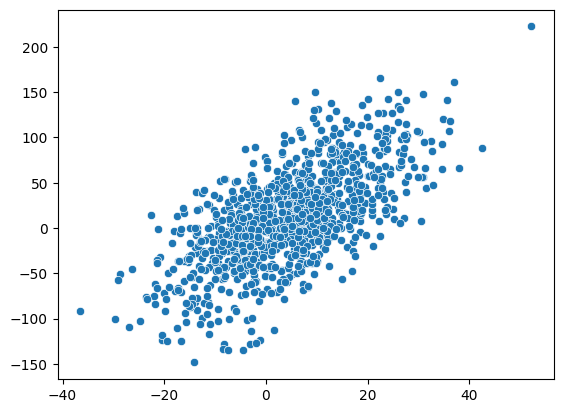

In [77]:
  # y = 3x-4
size = 1000
np.random.seed(42)
X = np.random.normal(loc=4, scale=12.5, size=size)
# y = np.arange(100)
y = 3*X - 4 + 4*np.random.normal(0,10,size=size) #introduce noise on the linear equation to create random points

print(X.min(), X.max(), len(X), y.min(), y.max(), len(y))
sns.scatterplot(x=X, y=y)
plt.show()

In [8]:
# I will use 80% for training and 20% for testing
# Check the size of the train and test sizes and then label accordingly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(750, 250, 750, 250)

In [63]:
# Create/Compile/Fit/predict/History of the Keras model
# 1.Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, tf.keras.activations.relu, input_dim=1))
# model.add(tf.keras.layers.Dense(3, tf.keras.activations.relu))

# 2. Compile the model (it has loss, optimizer and metrics/error components)
model.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=tf.keras.metrics.mae
)

# 3. Fit and predict
history = model.fit(X_train, y_train, epochs=5)
# with activations function
model.get_weights()

Epoch 1/5
24/24 [==============================] - 1s 4ms/step - loss: 2968.1304 - mean_absolute_error: 42.2918
Epoch 2/5
24/24 [==============================] - 0s 3ms/step - loss: 2861.7166 - mean_absolute_error: 41.5117
Epoch 3/5
24/24 [==============================] - 0s 3ms/step - loss: 2727.4934 - mean_absolute_error: 40.5626
Epoch 4/5
24/24 [==============================] - 0s 3ms/step - loss: 2598.1223 - mean_absolute_error: 39.5608
Epoch 5/5
24/24 [==============================] - 0s 3ms/step - loss: 2493.7263 - mean_absolute_error: 38.7313


[array([[ 1.0026466 ,  1.0159013 , -0.04295478,  0.94359976]],
       dtype=float32),
 array([ 0.9688241,  0.8779593, -0.9576659,  0.4712262], dtype=float32)]

In [44]:
#lets predict the model to training data
y_pred = model.predict(X_test)
y_pred.shape

8/8 [==============================] - 0s 3ms/step


(250, 4)

In [68]:
for i in range(y_pred.shape[1]):
  print(mean_squared_error(y_test, y_pred[:,i]))

1396.9638680254932
737.9614965898847
994.6695843012182
866.8692574874443


In [97]:
# or use evaluate when predicting, as per Dan B lets start coding
# 1. Define and Create the model
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(16, tf.keras.activations.linear, input_dim=1))
model.add(tf.keras.layers.Dense(16, input_dim=1))

# 2. Compile the model, that is define losses, optimize, check for errors
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics = tf.keras.metrics.mse
)
# fit and evaluat
history = model.fit(X_train, y_train, epochs=500, verbose=0)
#evaluate and print and predict
results = model.evaluate(X_test, y_test)
print("test loss, mse:", results)
y_pred=model.predict(X_test)
#convert the dict_items into a dict then get the last data by using -1
dict(history.history.items()).get('loss')[-1], dict(history.history.items()).get('mean_squared_error')[-1]

8/8 [==============================] - 0s 3ms/step - loss: 32.3169 - mean_squared_error: 1674.8696
test loss, mse: [32.316890716552734, 1674.86962890625]
8/8 [==============================] - 0s 2ms/step


(31.28213882446289, 1572.42529296875)

<Axes: >

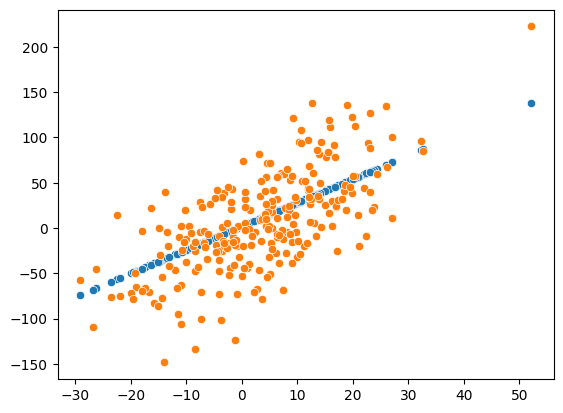

In [98]:
sns.scatterplot(x=X_test,
                y=np.mean(y_pred, axis=1)
                )
sns.scatterplot(x=X_test,
                y=y_test)

24/24 [==============================] - 0s 4ms/step


<Axes: >

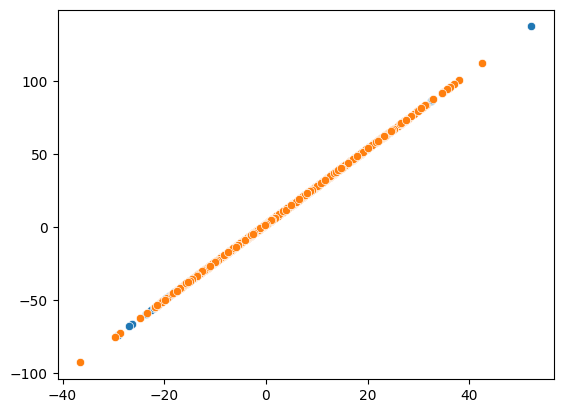

In [112]:
sns.scatterplot(x=X_test,
                y=np.mean(y_pred, axis=1)
               )
# sns.scatterplot(x=X_test,
#                 y=y_test)
# sns.scatterplot(x=X_train,
#                 y=y_train)
sns.scatterplot(
    x=X_train,
    y=np.mean(model.predict(X_train), axis=1)
)

-36.51584175086341 52.159143633184016 1000 -160.2448676313527 200.8058612283168 1000


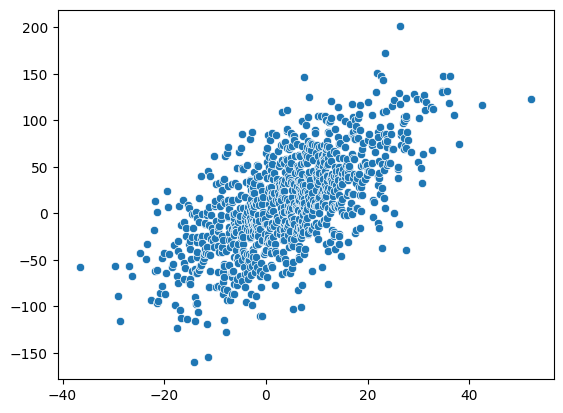

In [123]:
  # y = 3x-4
size = 1000
np.random.seed(42)
X = np.random.normal(loc=4, scale=12.5, size=size)
X=np.sort(X)
# y = np.arange(100)
y = 3*X - 4 + 4*np.random.normal(0,10,size=size) #introduce noise on the linear equation to create random points

print(X.min(), X.max(), len(X), y.min(), y.max(), len(y))
sns.scatterplot(x=X, y=y)
plt.show()

In [133]:
# I will use 80% for training and 20% for testing
# Check the size of the train and test sizes and then label accordingly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# X_train = np.sort(X_train)
# X_test = np.sort(X_test)
# y_train = np.sort(y_train)
# y_test = np.sort(y_test)
# len(X_train), len(X_test), len(y_train), len(y_test)

In [135]:
# or use evaluate when predicting, as per Dan B lets start coding
# 1. Define and Create the model
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(16, tf.keras.activations.linear, input_dim=1))
model.add(tf.keras.layers.Dense(16, input_dim=1))

# 2. Compile the model, that is define losses, optimize, check for errors
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics = tf.keras.metrics.mse
)
# fit and evaluat
history = model.fit(X_train, y_train, epochs=500, verbose=0)
#evaluate and print and predict
results = model.evaluate(X_test, y_test)
print("test loss, mse:", results)
y_pred=model.predict(X_test)
#convert the dict_items into a dict then get the last data by using -1
dict(history.history.items()).get('loss')[-1], dict(history.history.items()).get('mean_squared_error')[-1]

8/8 [==============================] - 0s 3ms/step - loss: 32.2613 - mean_squared_error: 1656.2180
test loss, mse: [32.261322021484375, 1656.218017578125]
8/8 [==============================] - 0s 2ms/step


(31.43360710144043, 1573.60888671875)

24/24 [==============================] - 0s 2ms/step


<Axes: >

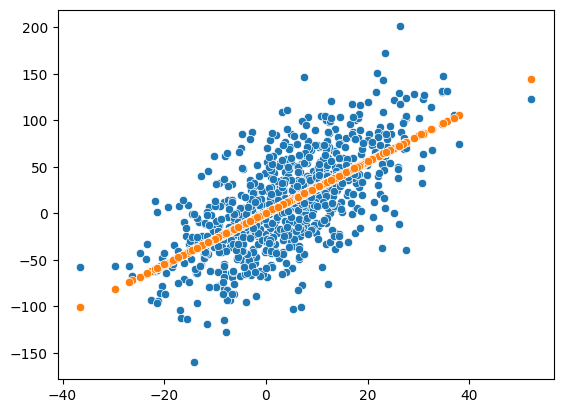

In [136]:
# sns.scatterplot(x=X_test,
#                 y=np.mean(y_pred, axis=1)
#                )
# sns.scatterplot(x=X_test,
#                 y=y_test)
sns.scatterplot(x=X_train,
                y=y_train)
sns.scatterplot(
    x=X_train,
    y=np.mean(model.predict(X_train), axis=1)
)